## HW1 Problem 3
## Name: 

### Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve


### 1. Loading the data set

#### a.

In [2]:
data = pd.read_csv("data.csv") 


#### b.

In [11]:
print('There are ', len(data.columns),' columns in the matrix')
print('The columns number does not match to the description, where the online summary says theres only 32 columns')

There are  33  columns in the matrix
The columns number does not match to the description, where the online summary says theres only 32 columns


#### c. 

In [4]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### 2. Matrix scatter plot

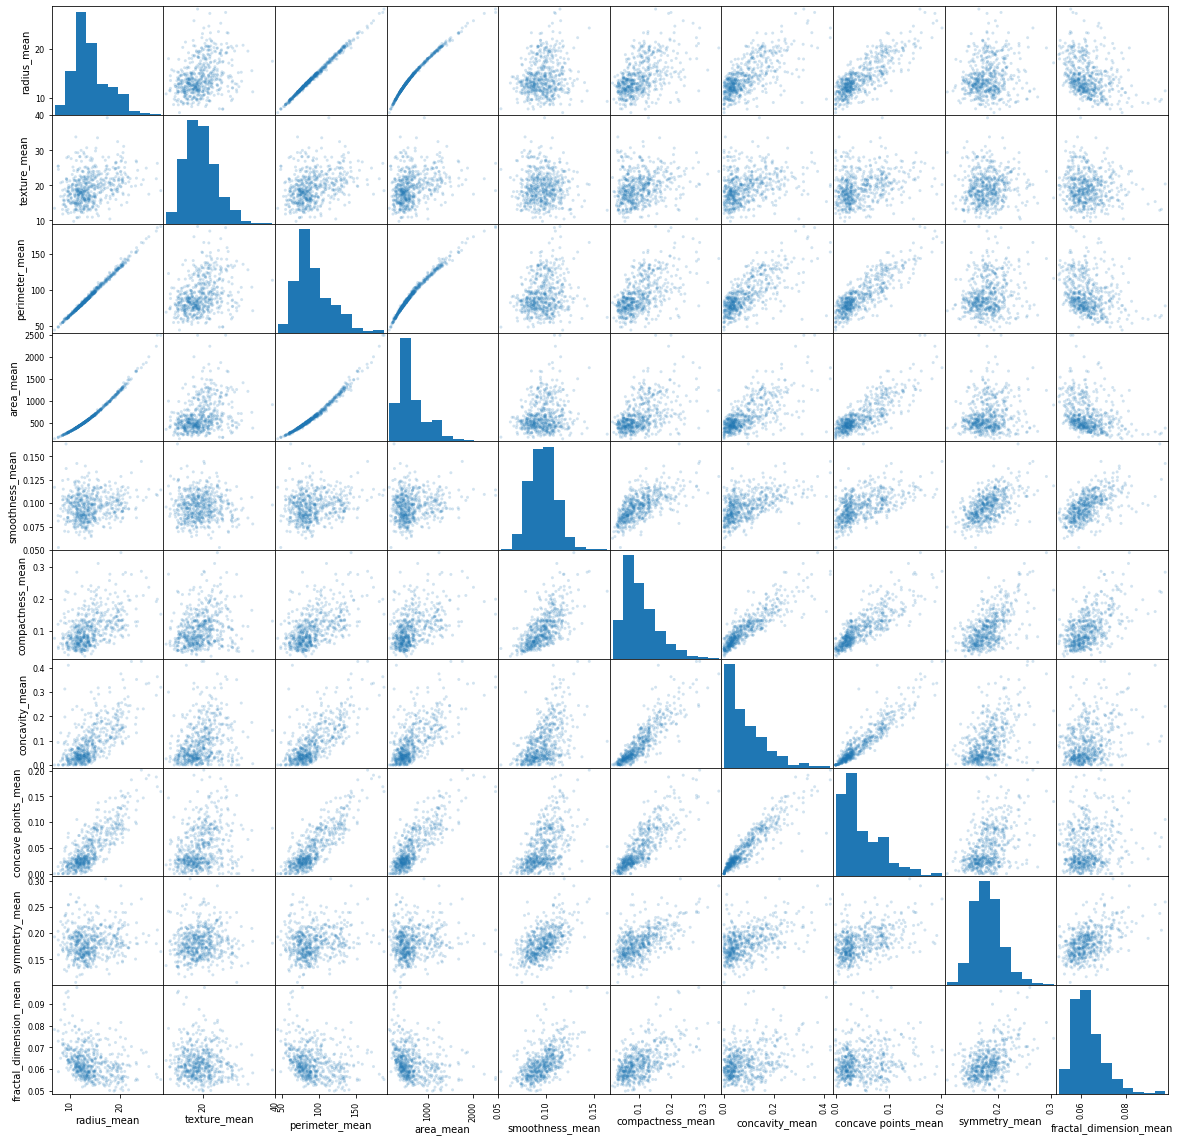

In [5]:
selectedData = data.iloc[:,2:12];
pd.plotting.scatter_matrix(selectedData, alpha=0.2)
fig = plt.gcf()
fig.set_size_inches(20,20)

### 3. Calculations
#### a.

In [6]:
cateCol = data.iloc[:,1]
x = cateCol.value_counts()
print('Benign case contains ',x[0],' patients')
print('Malignant case contains ',x[1],' patients')

Benign case contains  357  patients
Malignant case contains  212  patients


#### b.

In [7]:
print('Mean of each group equals to: \n', np.mean(selectedData))
print(' ')
print('Standard Deviation of each group equals to: \n', np.std(selectedData))

Mean of each group equals to: 
 radius_mean                14.127292
texture_mean               19.289649
perimeter_mean             91.969033
area_mean                 654.889104
smoothness_mean             0.096360
compactness_mean            0.104341
concavity_mean              0.088799
concave points_mean         0.048919
symmetry_mean               0.181162
fractal_dimension_mean      0.062798
dtype: float64
 
Standard Deviation of each group equals to: 
 radius_mean                 3.520951
texture_mean                4.297255
perimeter_mean             24.277619
area_mean                 351.604754
smoothness_mean             0.014052
compactness_mean            0.052766
concavity_mean              0.079650
concave points_mean         0.038769
symmetry_mean               0.027390
fractal_dimension_mean      0.007054
dtype: float64


#### c.

In [8]:
malignantGroup = selectedData[cateCol == 'M']
benignGroup = selectedData[cateCol == 'B']

print('Mean of each malignant Group equals to: \n', np.mean(malignantGroup))
print(' ')
print('Standard Deviation of each malignant Group equals to: \n', np.std(malignantGroup))
print(' ')
print(' ')
print('Mean of each benign Group equals to: \n', np.mean(benignGroup))
print(' ')
print('Standard Deviation of each benign Group equals to: \n', np.std(benignGroup))

Mean of each malignant Group equals to: 
 radius_mean                17.462830
texture_mean               21.604906
perimeter_mean            115.365377
area_mean                 978.376415
smoothness_mean             0.102898
compactness_mean            0.145188
concavity_mean              0.160775
concave points_mean         0.087990
symmetry_mean               0.192909
fractal_dimension_mean      0.062680
dtype: float64
 
Standard Deviation of each malignant Group equals to: 
 radius_mean                 3.196406
texture_mean                3.770546
perimeter_mean             21.803048
area_mean                 367.069174
smoothness_mean             0.012578
compactness_mean            0.053860
concavity_mean              0.074842
concave points_mean         0.034293
symmetry_mean               0.027573
fractal_dimension_mean      0.007555
dtype: float64
 
 
Mean of each benign Group equals to: 
 radius_mean                12.146524
texture_mean               17.914762
perimeter_mea

#### d.

In [10]:
x = selectedData[(data.iloc[:,2] >= 15)&(cateCol == 'B')].count()/selectedData[(cateCol == 'B')].count()
print(100*x[1],'% of benign tumors have a radius of at least 15um')

3.6414565826330536 % of benign tumors have a radius of at least 15um


### 4. OLS
#### a.

In [10]:
x = data.iloc[:,2].to_numpy()
y = data.iloc[:,5].to_numpy()

At = [x,np.ones(len(x))]
A_1st = np.transpose(At)
Ainv = np.linalg.pinv(A_1st)

coef_1st = np.matmul(Ainv, y)
print(coef_1st)

r = sum((np.dot(A_1st,coef_1st)-y)**2)
print(r)

[  98.59821922 -738.0367042 ]
1767428.9562542264


#### b.

In [11]:
At = [x**2,x,np.ones(len(x))]
A_2nd = np.transpose(At)
Ainv = np.linalg.pinv(A_2nd)

coef_2nd = np.matmul(Ainv, y)
print(coef_2nd)

r = sum((np.dot(A_2nd,coef_2nd)-y)**2)
print(r)

[  3.10992516   0.43684601 -10.5164038 ]
123097.70230710565


### 5. Plots
#### a.

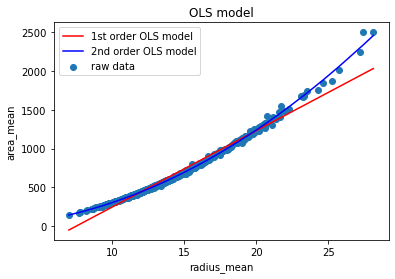

In [12]:
ax = plt.axes()
ax.scatter(x,y, label='raw data')
ax.plot(np.sort(x),np.sort(np.dot(A_1st,coef_1st)), '-r', label='1st order OLS model')
new_y = np.dot(A_2nd,coef_2nd)
ax.plot(np.sort(x),np.sort(new_y),'-b', label='2nd order OLS model')
ax.legend()
ax.set(xlabel='radius_mean', ylabel='area_mean' ,title='OLS model');

plt.show()

####  b.

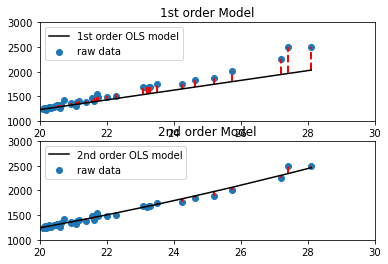

In [13]:

plt.subplot(211)
plt.plot(np.sort(x),np.sort(np.dot(A_1st,coef_1st)), '-k', label='1st order OLS model')
plt.scatter(x,y, label='raw data')
plt.vlines(np.sort(x), np.sort(np.dot(A_1st,coef_1st)),np.sort(y), lw=2,colors='red',linestyles='dashed')
ax1 = plt.gca()
ax1.set(xlim=(20, 30),ylim=(1000, 3000),
       title='1st order Model');
ax1.legend()


plt.subplot(212)
plt.plot(np.sort(x),np.sort(new_y),'-k', label='2nd order OLS model')
plt.scatter(x,y, label='raw data')
plt.vlines(np.sort(x), np.sort(new_y),np.sort(y), lw=2,colors='red',linestyles='dashed')
ax2 = plt.gca()
ax2.set(xlim=(20, 30),ylim=(1000, 3000),
       title='2nd order Model');
ax2.legend()
plt.show()